In [136]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 


In [137]:
train_data = pd.read_csv("train.csv")
test_data = pd.read_csv("test.csv")

In [138]:
train_data.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [139]:
train_data.columns.values

array(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'], dtype=object)

In [140]:
train_data.shape, test_data.shape 

((891, 12), (418, 11))

In [141]:
'''
PassengerId : Id hành khách
Survived : Sống(0) hay chết(1) ?
Pclass :lớp ghế trên tàu 1 or 2 or 3 
Name : Tên
Sex : Giới tính 
Age : Tuổi
SibSp : Số lượng a/chị/e hoặc vợ chồng trên tàu
Parch : Số lượng cha/mẹ / con cái trên tàu
Ticket: Số vé 
Fare : Giá vé 
Cabin: Số hiệu phòng ( nếu có )
Embarked : Cảng lên tàu ( C = Cherbourg , Q = Queentown , S = Southamton)
'''

'\nPassengerId : Id hành khách\nSurvived : Sống(0) hay chết(1) ?\nPclass :lớp ghế trên tàu 1 or 2 or 3 \nName : Tên\nSex : Giới tính \nAge : Tuổi\nSibSp : Số lượng a/chị/e hoặc vợ chồng trên tàu\nParch : Số lượng cha/mẹ / con cái trên tàu\nTicket: Số vé \nFare : Giá vé \nCabin: Số hiệu phòng ( nếu có )\nEmbarked : Cảng lên tàu ( C = Cherbourg , Q = Queentown , S = Southamton)\n'

In [142]:
print(train_data.isnull().sum())
print("-"*40)
print(test_data.isnull().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64
----------------------------------------
PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64


Cabin thiếu khá nhiều nên có thể bỏ cột này vì dữ liệu null có thể ảnh hưởng sai đến kết quả

In [143]:
train_data.drop(['PassengerId','Cabin'],axis = 1 , inplace= True )
test_data.drop(['PassengerId','Cabin'],axis = 1 , inplace= True )

In [144]:
mean_age = train_data['Age'].mean().round()
train_data['Age'].fillna(mean_age,inplace = True )

In [145]:
mean_age = test_data['Age'].mean().round()
test_data['Age'].fillna(mean_age,inplace = True )

In [146]:
train_data['Embarked'].fillna(method = 'ffill',inplace = True )
test_data['Fare'].fillna(method = 'ffill',inplace = True )

In [147]:
print(train_data.info())
print("-"*30)
print(test_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       891 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Embarked  891 non-null    object 
dtypes: float64(2), int64(4), object(4)
memory usage: 69.7+ KB
None
------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    418 non-null    int64  
 1   Name      418 non-null    object 
 2   Sex       418 non-null    object 
 3   Age       418 non-null  

Nên chia dữ liệu thành 2 phần : 
- Các feature có tính phân loại : Survived, Pclass, Sex , Embarked 
- Các feature có tính tuyến tính: Age , SibSp, Parch , ...

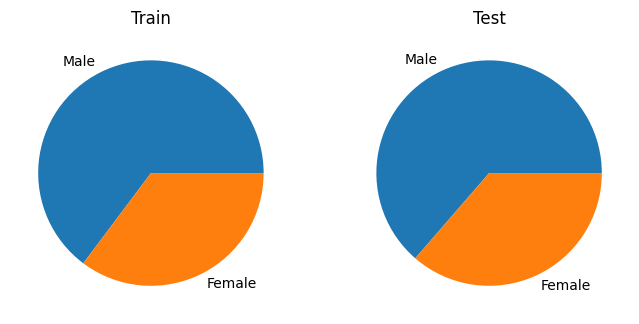

In [148]:
fig = plt.figure(figsize=(8,4))
count1 = train_data['Sex'].value_counts()
count2 = test_data['Sex'].value_counts()
plt.subplot(1,2,1)
plt.pie(count1,labels=["Male","Female"])
plt.title("Train")
plt.subplot(1,2,2)
plt.pie(count2,labels=['Male','Female'])
plt.title("Test")
plt.show()

In [149]:
train_data['Sex'] = train_data['Sex'].replace({'male': 1,'female':0})
test_data['Sex'] = test_data['Sex'].replace({'male': 1,'female':0})

([<matplotlib.axis.XTick at 0x2c99a8aab50>,
 [Text(0, 0, '0'), Text(1, 0, '1')])

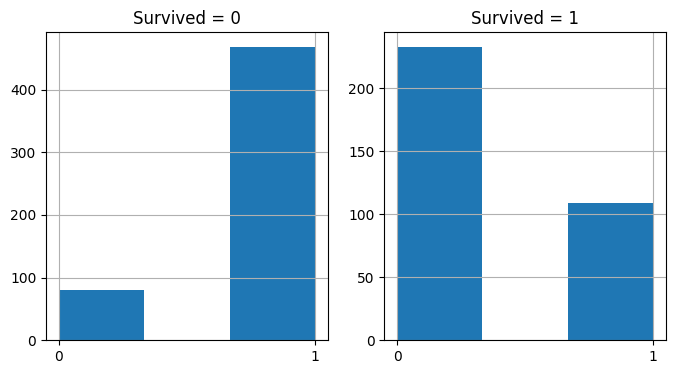

In [150]:
fig = plt.figure(figsize=(8,4))
plt.subplot(1,2,1)
train_data.loc[train_data['Survived'] == 0]['Sex'].hist(bins = 3)
plt.title("Survived = 0")
plt.xticks([0,1])
plt.subplot(1,2,2)
train_data.loc[train_data['Survived'] == 1]['Sex'].hist(bins = 3)
plt.title("Survived = 1")
plt.xticks([0,1])

PClass


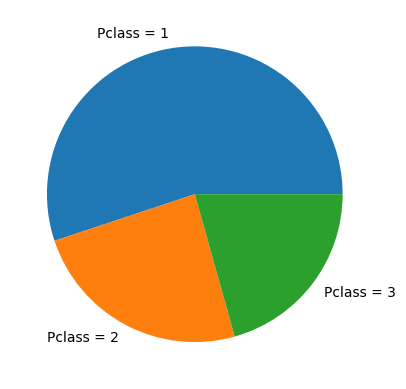

In [151]:
count = train_data['Pclass'].value_counts()
plt.pie(count,labels =['Pclass = 1','Pclass = 2','Pclass = 3'])
plt.show()

([<matplotlib.axis.XTick at 0x2c99a91ff90>,
 [Text(1, 0, '1'), Text(2, 0, '2'), Text(3, 0, '3')])

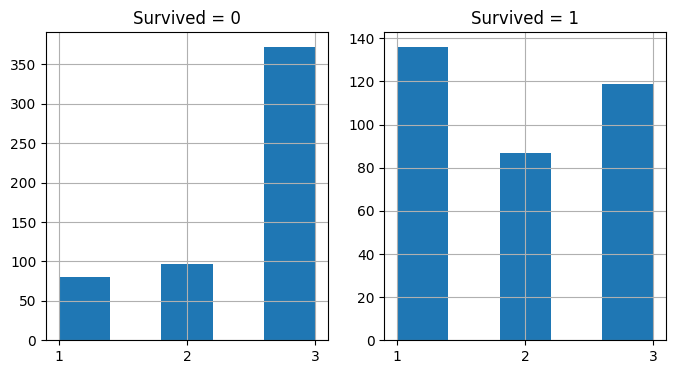

In [152]:
fig = plt.figure(figsize=(8,4))
plt.subplot(1,2,1)
train_data.loc[train_data['Survived'] == 0]['Pclass'].hist(bins = 5)
plt.title("Survived = 0")
plt.xticks([1,2,3])
plt.subplot(1,2,2)
train_data.loc[train_data['Survived'] == 1]['Pclass'].hist(bins = 5)
plt.title("Survived = 1")
plt.xticks([1,2,3])

Embarker 

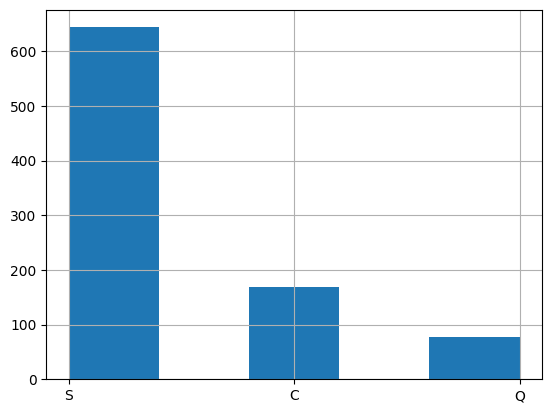

In [153]:
train_data['Embarked'].hist(bins = 5)
plt.show()

In [154]:
data = pd.DataFrame({'Survived':train_data['Survived'],'Embarked':train_data['Embarked']})

<Axes: xlabel='Embarked'>

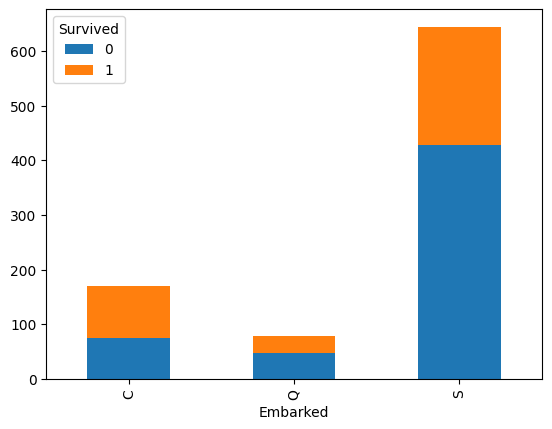

In [155]:
pivot_table = pd.pivot_table(data,values ='Survived',index ='Embarked',columns = 'Survived',aggfunc=len)
pivot_table.plot(kind = 'bar',stacked = True)

SibSp

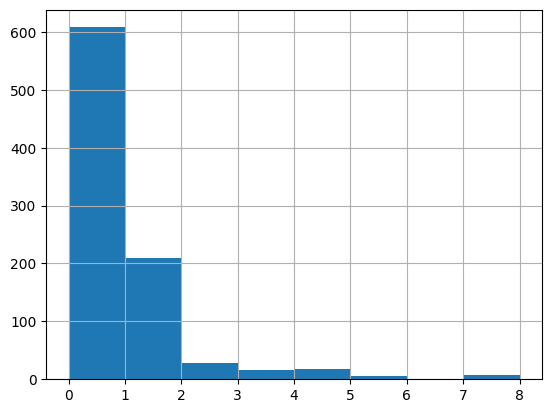

In [156]:
train_data['SibSp'].hist(bins = 8)
plt.show()

Text(0.5, 1.0, 'Survived = 1')

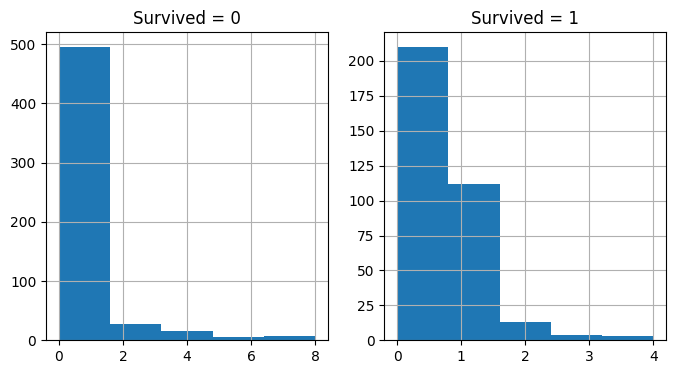

In [157]:
fig = plt.figure(figsize=(8,4))
plt.subplot(1,2,1)
train_data.loc[train_data['Survived'] == 0]['SibSp'].hist(bins = 5)
plt.title("Survived = 0")
plt.subplot(1,2,2)
train_data.loc[train_data['Survived'] == 1]['SibSp'].hist(bins = 5)
plt.title("Survived = 1")

Parch

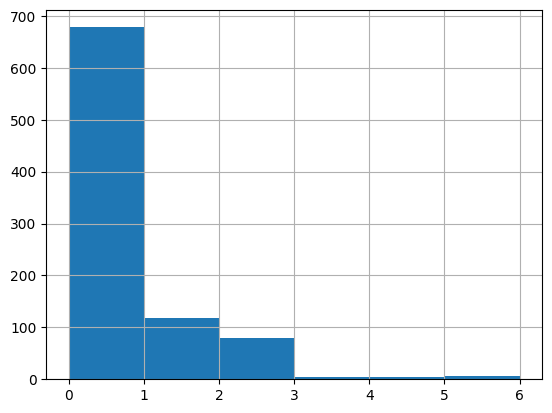

In [158]:
train_data['Parch'].hist(bins = 6)
plt.show()

Text(0.5, 1.0, 'Survived = 1')

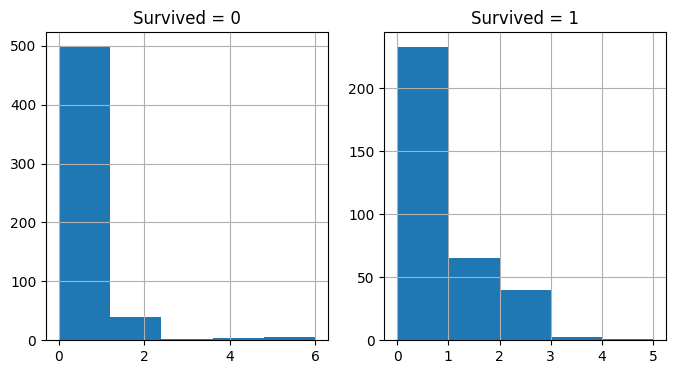

In [159]:
fig = plt.figure(figsize=(8,4))
plt.subplot(1,2,1)
train_data.loc[train_data['Survived'] == 0]['Parch'].hist(bins = 5)
plt.title("Survived = 0")
plt.subplot(1,2,2)
train_data.loc[train_data['Survived'] == 1]['Parch'].hist(bins = 5)
plt.title("Survived = 1")

Tuổi

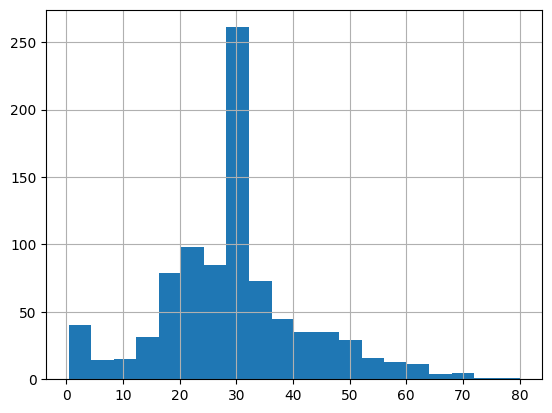

In [160]:
train_data['Age'].hist(bins = 20)
plt.show()

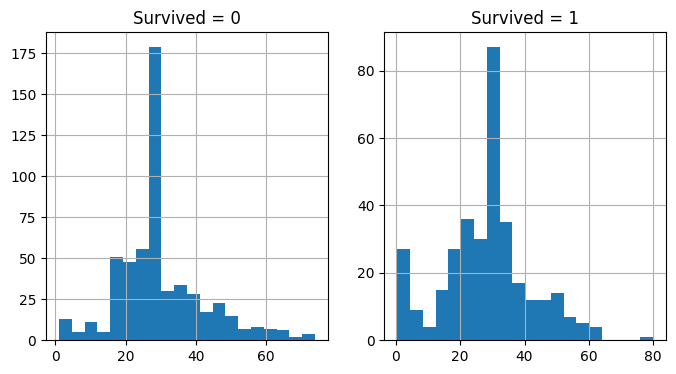

In [161]:
fig = plt.figure(figsize=(8,4))
plt.subplot(1,2,1)
train_data.loc[train_data['Survived'] == 0]['Age'].hist(bins = 20)
plt.title("Survived = 0")
plt.subplot(1,2,2)
train_data.loc[train_data['Survived'] == 1]['Age'].hist(bins = 20)
plt.title("Survived = 1")
plt.show()


Bỏ qua một số cột ko liên quan đến độ sống sót 

In [162]:
train_data.drop(['Ticket','Name'],axis = 1,inplace = True)
test_data.drop(['Ticket','Name'],axis = 1 ,inplace = True)

In [163]:
train_data.shape,test_data.shape

((891, 8), (418, 7))

In [164]:
train_data.columns

Index(['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare',
       'Embarked'],
      dtype='object')

In [165]:
train_data['Embarked'] = train_data['Embarked'].map( {'S': 0, 'C': 1, 'Q': 2} ).astype(int)

In [168]:
group = pd.qcut(train_data['Fare'], 4)
train_data[['Fare', 'Survived']].groupby(['Fare'], as_index=False).mean().sort_values(by='Fare', ascending=True)
group

0       (-0.001, 7.91]
1      (31.0, 512.329]
2       (7.91, 14.454]
3      (31.0, 512.329]
4       (7.91, 14.454]
            ...       
886     (7.91, 14.454]
887     (14.454, 31.0]
888     (14.454, 31.0]
889     (14.454, 31.0]
890     (-0.001, 7.91]
Name: Fare, Length: 891, dtype: category
Categories (4, interval[float64, right]): [(-0.001, 7.91] < (7.91, 14.454] < (14.454, 31.0] < (31.0, 512.329]]

In [177]:
train_data.loc[train_data['Fare']<= 7.91,'Fare'] = 0
train_data.loc[(train_data['Fare']> 7.91) & (train_data['Fare']<= 14.454),'Fare'] = 1
train_data.loc[(train_data['Fare']>14.454) &(train_data['Fare']<= 31),'Fare'] = 2
train_data.loc[train_data['Fare']>31,'Fare'] = 3

In [178]:
train_data['Fare']

0      0.0
1      3.0
2      1.0
3      3.0
4      1.0
      ... 
886    1.0
887    2.0
888    2.0
889    2.0
890    0.0
Name: Fare, Length: 891, dtype: float64

In [180]:
group = pd.qcut(train_data['Age'], 4)
group

0      (0.419, 22.0]
1       (35.0, 80.0]
2       (22.0, 30.0]
3       (30.0, 35.0]
4       (30.0, 35.0]
           ...      
886     (22.0, 30.0]
887    (0.419, 22.0]
888     (22.0, 30.0]
889     (22.0, 30.0]
890     (30.0, 35.0]
Name: Age, Length: 891, dtype: category
Categories (4, interval[float64, right]): [(0.419, 22.0] < (22.0, 30.0] < (30.0, 35.0] < (35.0, 80.0]]

In [181]:
train_data.loc[train_data['Age']<= 22,'Age'] = 0
train_data.loc[(train_data['Age']> 22) & (train_data['Age']<= 30),'Age'] = 1
train_data.loc[(train_data['Age']>30) &(train_data['Age']<= 35),'Age'] = 2
train_data.loc[train_data['Age']>35,'Age'] = 3

In [182]:
train_data.shape

(891, 8)

In [183]:
train_data.head(5)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,0.0,1,0,0.0,0
1,1,1,0,3.0,1,0,3.0,1
2,1,3,0,1.0,0,0,1.0,0
3,1,1,0,2.0,1,0,3.0,0
4,0,3,1,2.0,0,0,1.0,0


In [184]:
Y = train_data['Survived']
X = train_data.drop("Survived",axis=1)

In [189]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC, LinearSVC

In [188]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2)

In [190]:
svm = SVC()
svm.fit(X_train,Y_train)

SVC()

In [191]:
svm.predict(X_test)

array([0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1,
       0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0,
       0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0], dtype=int64)

In [192]:
svm.score(X_test,Y_test)

0.8156424581005587